#Section 1: Introduction to Quantum Data Encoding

**Clarification on Terminology**

In this notebook, we will be encoding classical data into quantum states using two methods: angle encoding and amplitude encoding. To ensure clarity:
- A **data point** (also called a sample) refers to one instance in a dataset, such as a single row in a table or one image from a dataset.
- A **feature vector** refers to the set of values that describe this data point. For example, for a single image, features might include pixel intensities, color histograms, or edge counts. We represent this as:
 <center>$\mathbf{x} = [x_1, x_2, \dots, x_n]$</center>

  where $x_i$ is the value of the $i$-th feature.
- In the notebook, when we refer to a “data vector” or “vector of values,” we specifically mean a **feature vector** for one data point.

In angle encoding, each feature in a feature vector is mapped to a rotation gate on a separate qubit. In amplitude encoding, the entire feature vector is encoded into the amplitudes of a quantum state. We will follow this convention consistently throughout the notebook.


# Quantum Data Encoding - Angle and Amplitude Encoding  

In quantum computing, classical data must be converted into quantum states so that quantum algorithms can operate on it. This process is known as **quantum data encoding**.  

There are several encoding methods, but in this notebook, we will focus on two fundamental techniques:  
1. **Angle Encoding**  
2. **Amplitude Encoding**  

Before we delve into the encoding methods, let's first understand some basic quantum concepts.  

---

### Quantum States and Qubits  

A quantum state represents the state of a qubit in the quantum computing framework. A qubit can be expressed as a linear combination of two basis states $|0\rangle$ and $|1\rangle$:  

<center>|$\psi\rangle = \alpha |0\rangle + \beta |1\rangle $</center>

where:  
- $|\psi\rangle$ is the quantum state,  
- $\alpha$ and $\beta$ are complex numbers called **amplitudes**,  
- The squared magnitudes of these amplitudes must sum up to 1:  

<center>|$\alpha|^2 + |\beta|^2 = 1 $</center>

This constraint ensures that the state vector remains normalized and can be properly represented on the **Bloch Sphere**, a 3D visualization of quantum states.

---

### Bloch Sphere Representation  

The Bloch sphere is a geometrical representation of a single qubit state. The state vector $|\psi\rangle$ can be expressed as:  

<center>|$\psi\rangle = \cos(\theta/2) |0\rangle + e^{i\phi} \sin(\theta/2) |1\rangle$</center>

where:  
- $\theta$ is the **polar angle**,  
- $\phi$ is the **azimuthal angle**.

We will use the Bloch sphere to visualize how the data is encoded using angle and amplitude encoding.


#Section 2: Angle Encoding - Detailed Overview and Implementation

# Angle Encoding  

In **angle encoding**, we represent classical data as rotation angles in a quantum circuit. This is particularly useful for datasets with small dimensionality, where each data point can be mapped to a rotation operation.

### How Angle Encoding Works  

Suppose we have a data point $x$. We can encode it as a rotation around the $Y$-axis of a qubit as follows:  

<center>$|\psi\rangle = R_y(x) |0\rangle = \cos(x/2) |0\rangle + \sin(x/2) |1\rangle$</center>

where:  
- $R_y(x)$ is a rotation gate defined as:  

$R_y(x)$ = \begin{bmatrix}
\cos(x/2) & -\sin(x/2) \\
\sin(x/2) & \cos(x/2)
\end{bmatrix}

- The angle $x$ must be in radians.  

This encoding method is straightforward to implement using Qiskit, as we can directly use the `ry()` gate to apply the rotation.


#Implementation - Angle Encoding in Qiskit

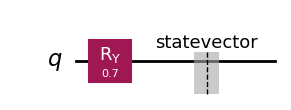


Angle Encoding Statevector: Statevector([0.93937271+0.j, 0.34289781+0.j],
            dims=(2,))



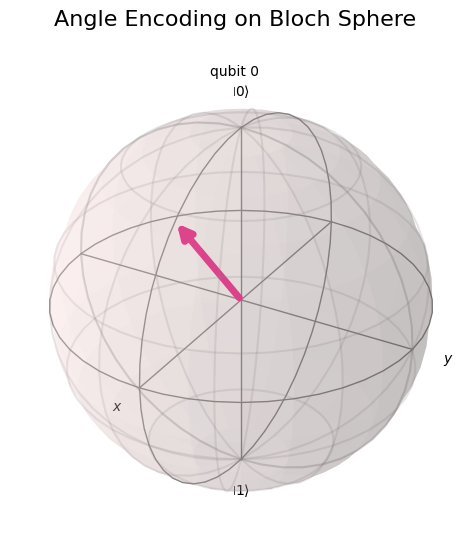

In [ ]:
# Install Qiskit and the Qiskit Aer module
!pip install qiskit qiskit-aer pylatexenc --quiet

# Import necessary libraries
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt
from IPython.display import display

# --- Task 1: Angle Encoding Implementation ---

# Data point to encode (in radians)
x_angle = 0.7

# Create a quantum circuit with one qubit
qc_angle = QuantumCircuit(1)

# Apply RY rotation based on the data point
qc_angle.ry(x_angle, 0)

# Save the statevector (required for AerSimulator)
qc_angle.save_statevector()

# Draw the circuit
display(qc_angle.draw('mpl'))  # Ensures the circuit is displayed in Colab

print()

# Use the statevector simulator
simulator = AerSimulator(method='statevector')

# Transpile the circuit for the simulator
qc_transpiled = transpile(qc_angle, simulator)

# Execute the circuit and get the statevector
job = simulator.run(qc_transpiled)
result = job.result()

# Extract the statevector
statevector = result.get_statevector()
print("Angle Encoding Statevector:", statevector)

print()

# Visualize the state on the Bloch sphere
plot_bloch_multivector(statevector, title='Angle Encoding on Bloch Sphere')

#Section 3: Amplitude Encoding - Detailed Overview and Implementation

# Amplitude Encoding  

In **amplitude encoding**, data values are mapped directly to the amplitudes of quantum states. This method is more compact and can encode multiple data points using fewer qubits, but it requires the data to be normalized.  

### How Amplitude Encoding Works  

For a data vector $\mathbf{x} = [x_1, x_2]$, the quantum state can be represented as:  

<center>$|\psi\rangle = x_1 |0\rangle + x_2 |1\rangle$</center>

where:  
- $x_1$ and $x_2$ must satisfy the normalization condition:

<center>$x_1^2 + x_2^2 = 1$</center>

For higher-dimensional data, multiple qubits are used to encode the data points as amplitudes.

### Why Normalization?  

The normalization requirement ensures that the state vector remains on the surface of the Bloch sphere, maintaining the probabilistic nature of quantum states.

#Implementation - Amplitude Encoding in Qiskit

Amplitude Encoding Circuit:


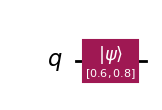


Statevector: Statevector([0.6+0.j, 0.8+0.j],
            dims=(2,))



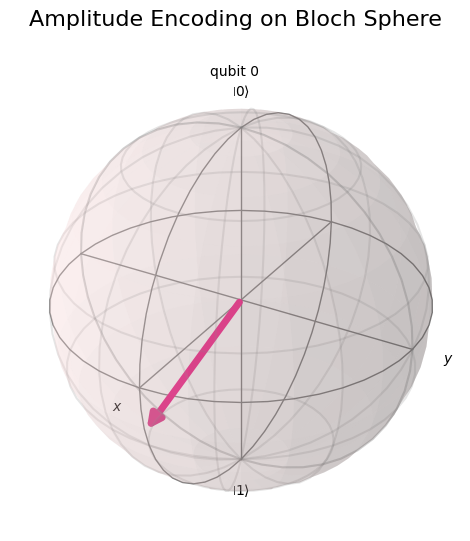

In [ ]:
# Import required modules
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt

# Data vector to encode
data_vector = [0.6, 0.8]

# Normalize the data vector
norm_data = data_vector / np.linalg.norm(data_vector)

# Create a single-qubit circuit for amplitude encoding
qc_amp = QuantumCircuit(1)
qc_amp.initialize(norm_data, 0)  # Initialize with normalized data

# Display the circuit
print("Amplitude Encoding Circuit:")
display(qc_amp.draw('mpl'))

print()

# Simulate using Statevector
state = Statevector(qc_amp)
print("Statevector:", state)

print()

# Visualize using plot_bloch_vector (more reliable than multivector)
plot_bloch_multivector(state, title="Amplitude Encoding on Bloch Sphere")

#Section 4: Comparison of Angle vs Amplitude Encoding

# Comparison of Angle and Amplitude Encoding  

| Aspect              | Angle Encoding                | Amplitude Encoding         |
|---------------------|--------------------------------|----------------------------|
| Data Capacity       | Limited to a single data point | Can encode multiple data points |
| Implementation      | Simple, requires single gate   | Requires normalization and initialization |
| Visualization       | Rotation-based                | State vector-based         |
| Complexity          | Low                           | High (for multi-qubit systems) |

---

### Key Takeaways:  
- **Angle encoding** is intuitive and easy to implement but has limited data capacity.  
- **Amplitude encoding** is more compact but requires careful normalization and is computationally intensive.  

In the next notebook, we will explore how to visualize encoded quantum states using **quantum state tomography**, enabling us to interpret the encoded features in more detail.


#Section 5: Activity for Notebook 1

# Activity: Implementing and Comparing Quantum Encoding Methods  

In this activity, you will implement both **Angle Encoding** and **Amplitude Encoding** for a set of data points. You will also compare the resulting quantum states using Bloch sphere visualizations.  

### **Task 1: Angle Encoding**

1. Given a data point $ x = 0.7 $.  
2. Implement angle encoding by applying a rotation around the Y-axis using the `ry()` gate.  
3. Visualize the resulting quantum state on the Bloch sphere.  

### **Task 2: Amplitude Encoding**

1. Givne a data vector $ \mathbf{x} = [0.4, 0.9] $.  
2. Normalize the data vector and implement amplitude encoding.  
3. Visualize the resulting quantum state on the Bloch sphere.  

### **Task 3: Comparison and Analysis**

1. Compare the Bloch sphere visualizations for both encoding methods.  
2. Discuss how the encoded states differ in their representation and capacity for data storage.  
3. Identify scenarios where angle encoding might be more suitable than amplitude encoding and vice versa.

#Section 6: Solution for the Activity

Angle Encoding Circuit:


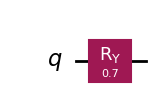


Statevector: Statevector([0.93937271+0.j, 0.34289781+0.j],
            dims=(2,))


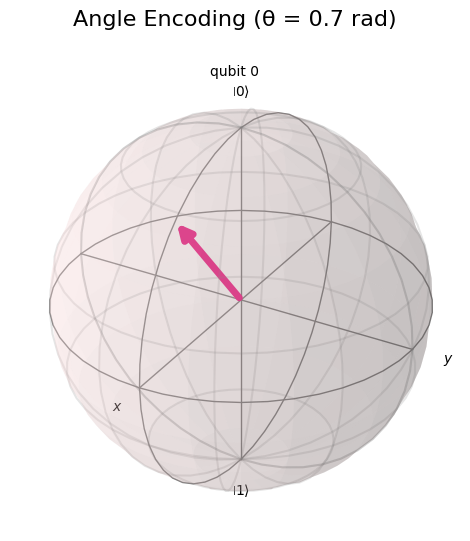

In [ ]:
# Import necessary libraries
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

# --- Task 1: Angle Encoding Implementation ---
# Data point to encode using angle encoding
x_angle = 0.7  # in radians

# Create and display the quantum circuit
qc_angle = QuantumCircuit(1)
qc_angle.ry(x_angle, 0)
print("Angle Encoding Circuit:")
display(qc_angle.draw('mpl'))

# Get statevector directly (more reliable than simulator)
state = Statevector(qc_angle)
print("\nStatevector:", state)

plot_bloch_multivector(state, title=f"Angle Encoding (θ = {x_angle} rad)")

Normalized data vector: [0.40613847 0.91381155]

Amplitude Encoding Circuit:


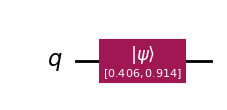


Statevector: Statevector([0.40613847+0.j, 0.91381155+0.j],
            dims=(2,))


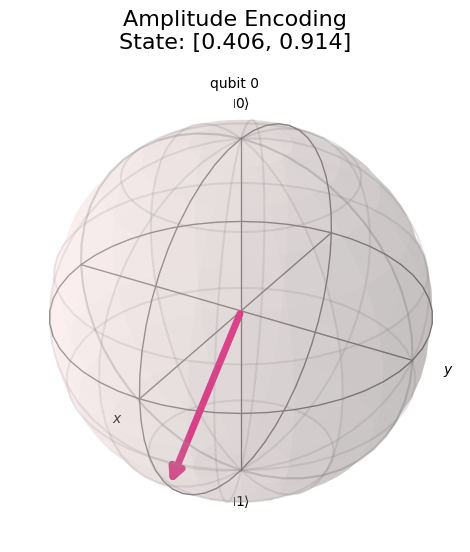

In [ ]:
# --- Task 2: Amplitude Encoding Implementation ---
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

# Data vector to encode using amplitude encoding
data_vector = [0.4, 0.9]

# Normalize the data vector
norm_data = data_vector / np.linalg.norm(data_vector)
print(f"Normalized data vector: {norm_data}")

# Create and display the quantum circuit
qc_amp = QuantumCircuit(1)
qc_amp.initialize(norm_data, 0)
print("\nAmplitude Encoding Circuit:")
display(qc_amp.draw('mpl'))

# Get statevector directly (more reliable than simulator)
state = Statevector(qc_amp)
print("\nStatevector:", state)

plot_bloch_multivector(state, title=f"Amplitude Encoding\nState: [{norm_data[0]:.3f}, {norm_data[1]:.3f}]")

Task 3: Comparison and Analysis

Question 1:
- The angle encoding visualizes the data as a rotation around the Y-axis.
- The amplitude encoding visualizes the data as a position on the Bloch sphere.

Question 2:
- Angle encoding is straightforward but can only encode a single value per qubit.
- Amplitude encoding is more compact, allowing for multiple data points to be encoded simultaneously, but it requires normalization and is computationally more intensive.
- From the Bloch sphere visualizations, we observe that the angle-encoded state rotates the qubit based on the data value, resulting in a simple, direct representation.  
- The amplitude-encoded state, however, is more complex as it maps data to the amplitude components, providing a more compact encoding but at the cost of higher computational complexity.

Question 3:
- In scenarios where data is single-valued and computational resources are limited, angle encoding may be more appropriate.  
- For multi-valued data or larger datasets, amplitude encoding can store more information in fewer qubits, but it requires careful normalization and state preparation.